## Data Science Bootcamp

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 231](#1)
* [Ćwiczenie 232](#2)
* [Ćwiczenie 233](#3)
* [Ćwiczenie 234](#4)
* [Ćwiczenie 235](#5)
* [Ćwiczenie 236](#6)
* [Ćwiczenie 237](#7)
* [Ćwiczenie 238](#8)
* [Ćwiczenie 239](#9)
* [Ćwiczenie 240](#10)

### <a name='0'></a>Import biblioteki

In [1]:
import numpy as np
import pandas as pd

np.__version__

'1.19.5'

### <a name='1'></a> Ćwiczenie 231
Zaimportuj bibliotekę _tensorflow_ w wersji 2.x.

In [2]:
%tensorflow_version 2.x
import tensorflow as tf

tf.__version__

'2.7.0'

Załaduj dane Fashion MNIST wykorzystując bibliotekę _tensorflow_. Odpowiednio zbiór treningowy (_X\_train_, _y\_train_) oraz testowy (_X\_test_, _y\_test_).

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


(X_train, y_train), (X_test, y_test) = load_data()

Sprawdź rozmiar zbiorów treningowych i testowych.

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


### <a name='2'></a> Ćwiczenie 232 
Wykorzytując bibliotekę _matplotlib_ wyświetl obraz ze zbioru treningowego z indeksem 40.

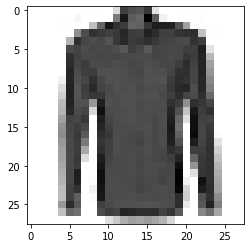

In [8]:
import matplotlib.pyplot as plt

plt.imshow(X_train[40], cmap='gray_r')

Wyświetl numer klasy dla próbki ze zbioru treningowego z ineksem 40.

In [9]:
y_train[40]

6

### <a name='3'></a> Ćwiczenie 233
Wystandaryzuj dane. Podziel wartości tablic _X\_train_ oraz _X\_test_ przez wartość 255.0.

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0


### <a name='4'></a> Ćwiczenie 234
Zaimportuj klasę _Sequential_ z biblioteki _tensorflow_ wykorzystując pakiet _keras_.

In [11]:
from tensorflow.keras.models import Sequential

Zaimportuj warstwy _Flatten_ oraz _Dense_ z biblioteki _tensorflow_ wykorzystując pakiet _keras_.

In [12]:
from tensorflow.keras.layers import Flatten, Dense
# tutaj wpisz rozwiązanie

### <a name='5'></a> Ćwiczenie 235
Zbuduj model klasy _Sequential_.

In [13]:
model = Sequential()


Dodaj pierwszą warstwę typu _Flatten_ wraz z odpowiednio dobranym parametrem _input_shape_.

In [14]:
model.add(Flatten(input_shape=(28,28)))
# tutaj wpisz rozwiązanie

Dodaj kolejną warstwę typu _Dense_ z 128 neuronami i funkcją aktywacji _relu_.

In [15]:
model.add(Dense(units=128, activation='relu'))

Dodaj ostatnią warstwę typu _Dense_ z 10 neuronami i funkcją aktywacji _softmax_.

In [16]:
model.add(Dense(units=10, activation='softmax'))
# tutaj wpisz rozwiązanie

Wyświetl podsumowanie modelu.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### <a name='6'></a> Ćwiczenie 236
Skompiluj model. Wykorzystaj optymalizator _rmsprop_, funkcję straty _sparse_categorical_crossentropy_ oraz metrykę _accuracy_.

In [19]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### <a name='7'></a> Ćwiczenie 237
Dopasuj model do danych treningowych, ustawiając 10 epok oraz podział na zbiór walidacyjny wynoszący 0.2.

In [22]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5250 - accuracy: 0.8144 - val_loss: 0.4126 - val_accuracy: 0.8471
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3875 - accuracy: 0.8597 - val_loss: 0.4076 - val_accuracy: 0.8585
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3541 - accuracy: 0.8730 - val_loss: 0.3790 - val_accuracy: 0.8667
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3315 - accuracy: 0.8810 - val_loss: 0.3638 - val_accuracy: 0.8782
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3194 - accuracy: 0.8865 - val_loss: 0.4049 - val_accuracy: 0.8666
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3060 - accuracy: 0.8931 - val_loss: 0.3734 - val_accuracy: 0.8805
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2987 - accuracy: 0.8952 - val_loss: 0.3623 - val_accuracy:

### <a name='8'></a> Ćwiczenie 238
Dokonaj predykcji modelu na podstawie danych testowych.

In [25]:
y_pred = model.predict(X_test) 
classes_y=np.argmax(y_pred,axis=1)
classes_y

array([9, 2, 1, ..., 8, 1, 5])

Zbuduj macierz konfuzji (macierz pomyłek).

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, classes_y)
cm

array([[789,   2,  13,  32,   3,   2, 149,   0,  10,   0],
       [  3, 970,   0,  21,   4,   0,   1,   0,   1,   0],
       [  8,   3, 784,  11, 123,   0,  68,   0,   3,   0],
       [ 11,   5,  25, 890,  38,   1,  28,   0,   2,   0],
       [  0,   0, 116,  21, 831,   0,  31,   0,   1,   0],
       [  0,   0,   0,   1,   0, 929,   0,  43,   2,  25],
       [ 96,   0,  92,  31, 138,   0, 625,   0,  18,   0],
       [  0,   0,   0,   0,   0,   4,   0, 970,   0,  26],
       [  1,   0,   6,   3,   5,   1,   4,   6, 974,   0],
       [  0,   0,   0,   0,   0,   4,   1,  36,   0, 959]])

### <a name='9'></a> Ćwiczenie 239
Zbuduj obiekt pandas _DataFrame_ zawierający predykcje modelu. Nadaj nazwę kolumny _prediction_ i przypisz do zmiennej _results_.

In [30]:
results = pd.DataFrame(classes_y, columns=['prediction'])
results

,prediction
0,9
1,2
2,1
3,1
4,6
...,...
9995,9
9996,1
9997,8
9998,1


Przypisz nową kolumnę z wartościami ze zmiennej _y\_test_ i nazwij ją _y\_test_.

In [31]:
results['y_test'] = y_test
results

,prediction,y_test
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


Przypisz nową kolumnę o nazwie _is_misclassified_, która zwróci 1, gdy próbki zostaną błędnie sklasyfikowane, w przeciwnym przypadku 0.

In [33]:
results['is_missclassified'] = (results['prediction'] != results['y_test']).astype(int)
results

,prediction,y_test,is_missclassified
0,9,9,0
1,2,2,0
2,1,1,0
3,1,1,0
4,6,6,0
...,...,...,...
9995,9,9,0
9996,1,1,0
9997,8,8,0
9998,1,1,0


### <a name='10'></a> Ćwiczenie 240
Zapisz obiekt _results_ do pliku _results.csv_.

In [34]:
results.to_csv('results.csv')

In [35]:
!head results.csv

,prediction,y_test,is_missclassified
0,9,9,0
1,2,2,0
2,1,1,0
3,1,1,0
4,6,6,0
5,1,1,0
6,4,4,0
7,6,6,0
8,5,5,0
